# Airline flights price prediction
### A supervised machine learning regression problem with price as target features

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [3]:
df = pd.read_excel(r'/home/himanshi/Data Science Real World Projects in Python/Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Ways to observe null values:
**Feature Route and Total_stops have null values as their count differs from other features.** 

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#check ratio
df.isnull().sum()*100/df.shape[0]

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

**Look at all rows that have null values in any of the columns.**

In [8]:
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


**Since there is only one null value we can drop it. That is One way to deal with missing values.**

In [9]:
df.dropna(inplace = True)

In [10]:
#check for null values again
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Converting some columns to date time

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [12]:
def change_to_datetime(df, col):
    df[col] = pd.to_datetime(df[col])

In [13]:
for feature in (['Date_of_Journey', 'Dep_Time', 'Arrival_Time']):
    change_to_datetime(df, feature)

In [14]:
#column types have been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


## Extract relevant information from date time columns
### Add columns for details of journey time from Date of journey

In [15]:
df['journey_year'] = df['Date_of_Journey'].dt.year
df['journey_month'] = df['Date_of_Journey'].dt.month
df['journey_day'] = df['Date_of_Journey'].dt.day

In [16]:
#Remove the redundant info columm
df.drop(columns = ['Date_of_Journey'], inplace=True)

In [17]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-01-29 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-29 05:50:00,2023-01-29 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-01-29 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-01-29 18:05:00,2023-01-29 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-01-29 16:50:00,2023-01-29 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2023-01-29 19:55:00,2023-01-29 22:25:00,2h 30m,non-stop,No info,4107,2019,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,2023-01-29 20:45:00,2023-01-29 23:20:00,2h 35m,non-stop,No info,4145,2019,4,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2023-01-29 08:20:00,2023-01-29 11:20:00,3h,non-stop,No info,7229,2019,4,27
10681,Vistara,Banglore,New Delhi,BLR → DEL,2023-01-29 11:30:00,2023-01-29 14:10:00,2h 40m,non-stop,No info,12648,2019,1,3


### Add columns for hours and minutes from the Dep_time and Arrival_time, these columns are also dropped from the main dataset

In [18]:
def extract_hour_min(df, col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute
    df.drop(col, axis=1, inplace=True)

In [19]:
for feature in (['Dep_Time', 'Arrival_Time']):
    extract_hour_min(df, feature)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


## We want to visualize how many flights depart at what hours

In [20]:
def departure_time_group(x):
    if x > 4 and x <= 8:
        return "Early mrng"
    elif x > 8 and x <= 12:
        return "Morning"
    elif x > 12 and x <= 16:
        return "Noon"
    elif x > 16 and x <= 20:
        return "Evening"
    elif x > 20 and x <= 24:
        return "Late night"

<AxesSubplot:>

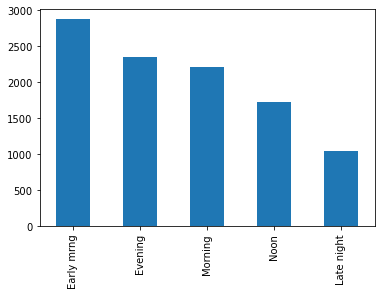

In [21]:
df['Dep_Time_hour'].apply(departure_time_group).value_counts().plot(kind='bar')

**How to make this plot interactive?**

In [22]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [23]:
cf.go_offline()

In [24]:
#cufflinks wrapper applied on top of matplotlib to make interactive plots unlike the static plots of matplotlib
df['Dep_Time_hour'].apply(departure_time_group).value_counts().iplot(kind='bar')

## Get hours and minutes from Duration
**Machine Learning model requires features to be numerical. Duration is an important feature but is stored as string, it must be converted to numbers to use it efficiently.**
1. Convert all into hours and minutes
2. Split hours and minutes

In [25]:
def preprocess_duration(x):
    if 'h' not in x:
        return '0h '+x
    elif 'm' not in x:
        return x+' 0m'
    else:
        return x

In [26]:
df['Duration'] = df['Duration'].apply(preprocess_duration)

In [27]:
df['Duration_hours'] = df['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [28]:
df['Duration_minutes'] = df['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [29]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,2019,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,2019,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,2019,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,2019,1,3,11,30,14,10,2,40


**This step calculates the total duration time of the flight in minutes to check if it has any imapact on the target.**
1. Convert the string of '10h 20m' into '10*60+20*1', then apply eval to evaluate the string into numerical value.
2. The plot a line plot of price V duration to check if there is a correlation.

In [30]:
df['Duration_total_minutes'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

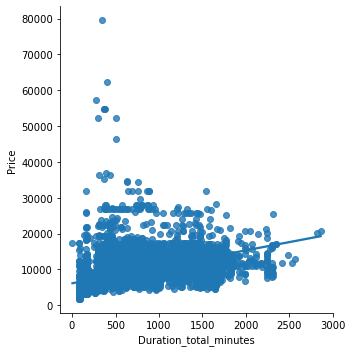

In [31]:
sns.lmplot(x='Duration_total_minutes', y='Price', data = df)
#There does seem to be a correlation between price and duration.

## Duration has now been encoded to hours and minutes so this column can be dropped

In [32]:
df.drop(columns = ['Duration'], inplace = True)

## Data Visualization
**Check which destination city has the most flights.**

<AxesSubplot:ylabel='Destination'>

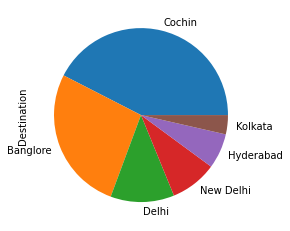

In [33]:
df['Destination'].value_counts().plot(kind='pie')
#We need to fix the fact that Delhi and New Delhi are counted separately.

**Which route has the most Jet Airways flights?**

In [34]:
df[df['Airline'] == 'Jet Airways']['Route'].value_counts()

CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: Route, dtype: int64

**Price Vs Airlines analysis**
1. Box plot is good at showing outliers.
2. Violine plot will show both outliers and the distribution of the price for each airline.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

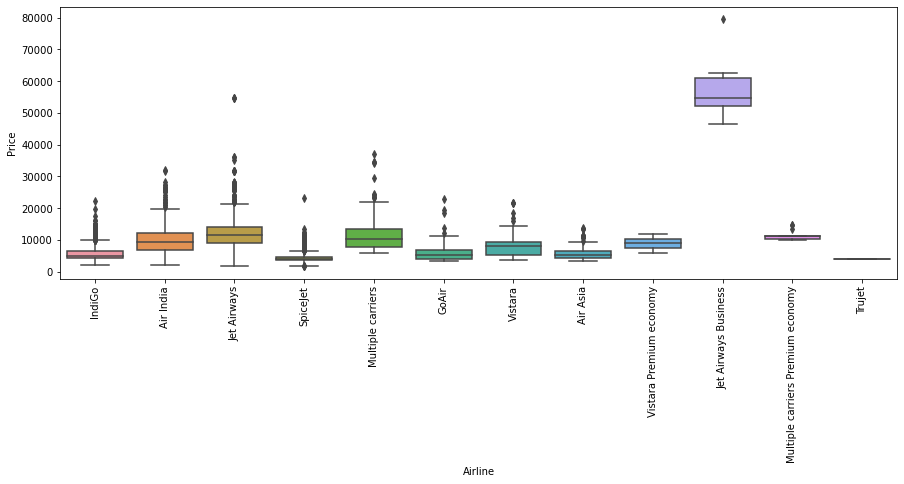

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'Airline', y = 'Price', data = df)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

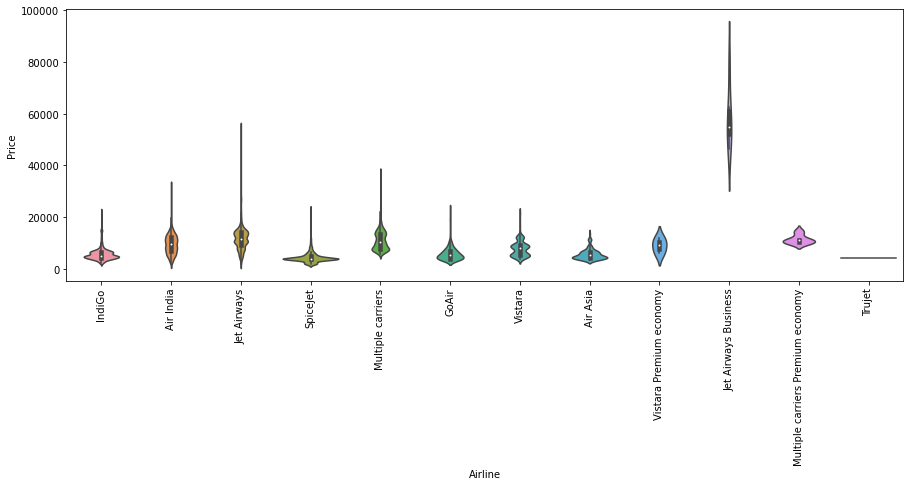

In [36]:
plt.figure(figsize=(15,5))
sns.violinplot(x = 'Airline', y = 'Price', data = df)
plt.xticks(rotation='vertical')

## 16. Apply one-hot encoding on data (Feature engineering)
### Before applying any encoding some columns are dropped based on their relevance.

In [37]:
with pd.option_context('display.max_columns', None):
    display(df)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,2019,9,4,19,55,22,25,2,30,150
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,2019,4,27,20,45,23,20,2,35,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,2019,4,27,8,20,11,20,3,0,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,2019,1,3,11,30,14,10,2,40,160


In [38]:
#observe Column additional info
np.round(df['Additional_Info'].value_counts()/len(df)*100, 2)
#Almost 80% of the data has no info so this columns can be dropped.

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [39]:
#Total Stops can account for the Route feature, so Total stops can be dropped.
#Duration has been accounted for by hours and minutes, we do not need Duration total minutes.
#Journey year is constant so that feature can be dropped too.
df.drop(columns = ['Additional_Info', 'Route', 'Duration_total_minutes', 'journey_year'], inplace = True)


**How numerical and categorical data is usually differentiated?**

In [40]:
cat_col = [col for col in df.columns if df[col].dtype=='object']
print(cat_col)

['Airline', 'Source', 'Destination', 'Total_Stops']


In [41]:
num_col = [col for col in df.columns if df[col].dtype!='object']
print(num_col)

['Price', 'journey_month', 'journey_day', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_minutes']


## Two ways to encode categorical features:
1. Ordianal encoder using OrdinalEncoder and LabelEncoder - for ordinal data
2. Nominal encoder using Pandas dummies and OneHotEncoder- for nominal data

Note: Difference between OrdinalEncoder and LabelEncoder: Both have the same functionality. A bit difference is the idea behind. OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.

That's why OrdinalEncoder can fit data that has the shape of (n_samples, n_features) while LabelEncoder can only fit data that has the shape of (n_samples,) (though in the past one used LabelEncoder within the loop to handle what has been becoming the job of OrdinalEncoder now)

## Nominal Encoding on Source: adds multiple columns to the dataset

In [42]:
for category in df['Source']:
    df['Source_'+category] = df['Source'].apply(lambda x: 1 if x == category else 0)
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


**Source has now been encoded to multiple columns through one hot encoder and the source column can now be dropped.**

In [43]:
df.drop(columns = ['Source'], inplace = True)

## Ordinal Encoding on Airlines using Price as basis
**Applying target guided encoding on data to avoid the curse of dimensionality.**  
Label Encoder on Airline using brute-force approach.

In [44]:
airlines = df.groupby(['Airline'])['Price'].mean().sort_values().index
print(airlines)

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')


In [45]:
dict1 = {key: index for index, key in enumerate(airlines, 0)}
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [46]:
df['Airline'] = df['Airline'].map(dict1)

In [47]:
df.head(3)

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Banglore,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,Cochin,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


## Ordinal Encoding on Destination using Price

In [48]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [49]:
df['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [50]:
destination = df.groupby(['Destination'])['Price'].mean().sort_values().index

In [51]:
dict2 = {key: index for index, key in enumerate(destination, 0)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [52]:
df['Destination'] = df['Destination'].map(dict2)

In [53]:
with pd.option_context("display.max_columns",None):
    display(df.head())

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


## Ordinal Encoding on Total stops using our own dictionary
**For stops we need our own dictionary.**

In [54]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [55]:
stops = {'non-stop':0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [56]:
df['Total_Stops'] = df['Total_Stops'].map(stops)

In [57]:
with pd.option_context("display.max_columns",None):
    display(df.head())

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


## 18. How to handle outliers in data
1. Visualize the outliers
2. Change the value of outliers to median

In [58]:
def plot(df, col):
    fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(10, 12))
    sns.histplot(x = col, data = df, ax = ax1, kde = True, element = 'poly')
    sns.boxplot(x = col, data = df, ax = ax2)
    sns.histplot(x = col, data = df, ax = ax3, kde = False) #returns Histograms
    plt.show()

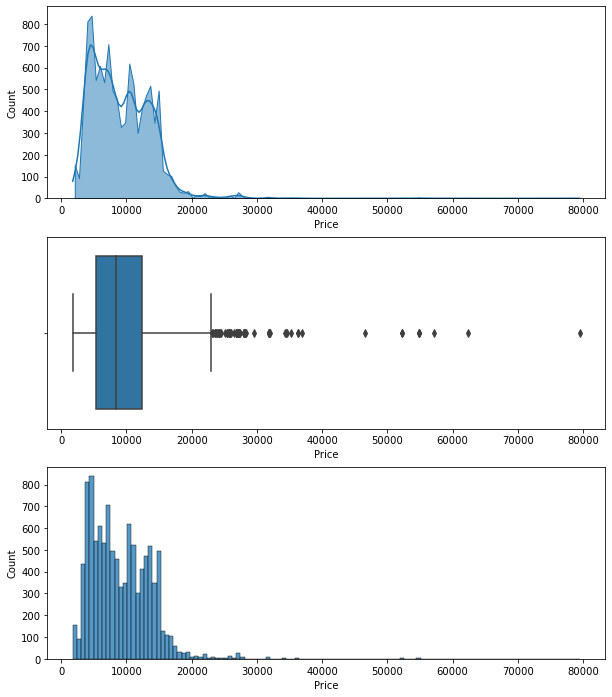

In [59]:
plot(df, 'Price')

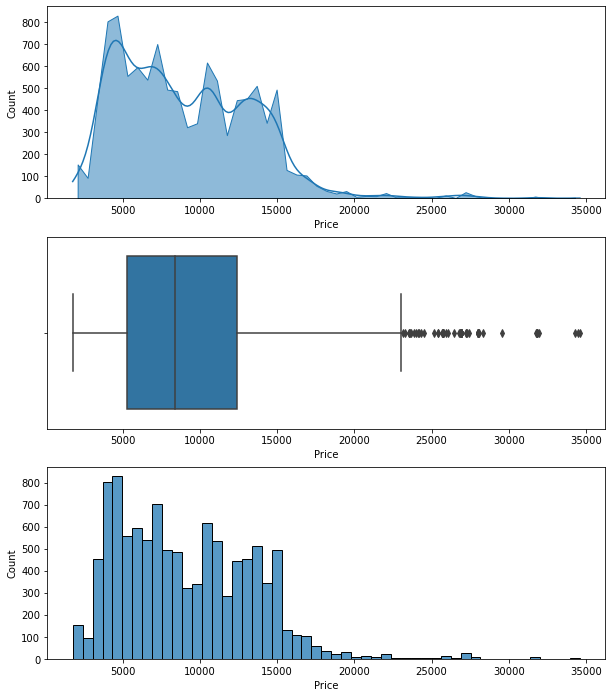

In [60]:
#There seem to be a lot of outliers let's reduce them.
df['Price'] = np.where(df['Price'] >= 35000, df['Price'].median(), df['Price'])
plot(df, 'Price')

## 19. Select Best features using Feature selection
Select features that contribute most to the target features.
There are several different methods to do this:   
1. SelectKBest: we have a score function associated with this method whose values defines the importance of the feature such as :  
- For regression use we have f_regression based on correlation  
- Mutual information regression based on a rigorous statistical test such as chi square, anova and p-value and typically measures the dependence between two variables

In [61]:
with pd.option_context("display.max_columns",None):
    display(df)

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4107.0,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,0,4145.0,4,27,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,0,7229.0,4,27,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,12648.0,1,3,11,30,14,10,2,40,1,0,0,0,0


In [62]:
df.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_month            int64
journey_day              int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_minutes         int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

### Which features contribute most to the target feature?

In [63]:
from sklearn.feature_selection import mutual_info_regression

X = df.drop(columns = ['Price'])
y = df['Price']
X

,Airline,Destination,Total_Stops,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,0,4,27,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,0,4,27,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,1,3,11,30,14,10,2,40,1,0,0,0,0


In [64]:
imp = pd.DataFrame(np.round(mutual_info_regression(X, y), 2), index = X.columns, columns = ['Importance'])
imp.sort_values('Importance', ascending = False)

,Importance
Destination,1.01
Airline,0.97
Total_Stops,0.79
Source_Delhi,0.52
Duration_hours,0.47
Source_Kolkata,0.46
Arrival_Time_hour,0.40
Source_Banglore,0.39
Duration_minutes,0.35
Dep_Time_hour,0.34


## Splitting the dataset for the ML model evaluation

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("Shape of training set X:", X_train.shape)
print("Shape of training set target features:", y_train.shape)
print("Shape of test set X:", X_test.shape)
print("Shape of test set target features:", y_test.shape)

Shape of training set X: (8011, 16)
Shape of training set target features: (8011,)
Shape of test set X: (2671, 16)
Shape of test set target features: (2671,)


In [68]:
#define machine learning model
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
r2_score = random_forest.score(X_test, y_test)
print("R squared for the random forest regressor:", round(r2_score, 2))

R squared for the random forest regressor: 0.81


### Hyper parameter tuning
Can we improve the accuracy of the random forest model?

In [76]:
from sklearn.model_selection import RandomizedSearchCV
orig_rf = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(1000, 1200, 6)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(5, 30, 4)]
min_samples_split = [5, 10, 15, 100]

params_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split}

rf_random = RandomizedSearchCV(orig_rf, param_distributions = params_grid, cv = 3, verbose = 2, n_jobs = -1)

In [77]:
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/himanshi/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/himanshi/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/himanshi/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default

{'n_estimators': 1000,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

[CV] END max_depth=30, max_features=auto, min_samples_split=5, n_estimators=1120; total time=  27.0s
[CV] END max_depth=13, max_features=auto, min_samples_split=5, n_estimators=1000; total time=  25.1s
[CV] END max_depth=13, max_features=auto, min_samples_split=5, n_estimators=1080; total time=  22.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=1040; total time=   4.5s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=1160; total time=   8.9s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=1160; total time=   8.8s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=100, n_estimators=1120; total time=   6.2s
[CV] END max_depth=30, max_features=auto, min_samples_split=5, n_estimators=1120; total time=  28.7s
[CV] END max_depth=13, max_features=auto, min_samples_split=5, n_estimators=1080; total time=  25.4s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=1080; total 

In [70]:
import pickle
file = open('random_forest.pkl', 'wb')
pickle.dump(random_forest, file)